<h1> SVM Classification </h1>

Support Vector Machine (SVM) is a powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, and even outlier detection.

Consider a linear equation is of the form:

$ y = 
  \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + .... + \theta_{n}x_{n}
$

This assumes a linear relationship between the dependent variable y and the p-vector of regressors x. $x_{n}$ - n is the number of regressors/parameters/dimensions.

If you visualize this in an Euclidean space - in a two-dimensional space, $x_{1}$ corresponds to the x coordinate, y value corresponds to the y coordinate. This is represented by the equation of the form $y = \theta_{0} + \theta_{1}x$ (or typically also written as `y = mx + c`). In a three-dimensional space, $x_{1}$ corresponds to the x coordinate, $x_{2}$ corresponds to the y coordinate and y value corresponds to the z coordinate written as $z = \theta_{0} + \theta_{1}x + \theta_{2}y$. Similarly, you can extend this to any number of dimensions.

The above equation can also be re-written as:

$ \theta_{1}x_{1} + \theta_{2}x_{2} + .... + \theta_{n}x_{n} - y + \theta_{0} =
  0
$

Here, y is also considered to be one of the features. 

Another way to represent this concept is to consider the example of a two-dimension case of writing the equation of a line that passes through a given point $p_0 = (x_0, y_0)$ and normal to the vector $w = (w_0, w_1)$. For any point on the line p = (x, y), the vector from (x, y) to $(x_0, y_0)$ will be on the line. Therefore, the dot product of this vector with the normal vector ($w$) should be zero:

$w \cdot \vec{pp_0} =
  0
$
$w_0 \times (x - x_0) + w_1 \times (y - y_0) = 
  0
$
$w_0 \times x + w_1 \times y - w_0 \times x_0 - w_1 \times y_0 = 
  0
$
$w_0 \times x + w_1 \times y + b =
  0
$

b is called the bias term

$ w^Tx + b = 0 \quad \text{where x is a point on the line}
$

Next, consider the example of a three-dimension case of writing the equation of a plane that passes through a given point $p_0 = (x_0, y_0, z_0)$ and normal to the vector $w = (w_0, w_1, w_2)$. For any point on the plane x = (x, y, z), the vector from (x, y, z) to $(x_0, y_0, z_0)$ will be on the plane. Therefore, the dot product of this vector with the normal vector ($w$) should be zero:

$ w \cdot \vec{pp_0} =
  0
$
$w_0 \times (x - x_0) + w_1 \times (y - y_0) + w_2 \times (z - z_0) =
  0
$
$w_0 \times x + w_1 \times y + w_2 \times z - w_0 \times x_0 - w_1 \times y_0 - w_2 \times z_0 =
  0
$
$w_0 \times x + w_1 \times y + + w_2 \times z + b = 
  0
$

<b> Matrix form </b>

$w^Tx + b = 0 \quad \text{where x is a point on the plane}
$

The above equation that we wrote for two-dimension case can also be generalized for any number of dimensions. The geometric entity on which the points lie on is called the hyperplane. For the two-dimensional case, this is a line (as shown above). For the two-dimensional case, the hyperplane is a plane. For all points (x), that are on the hyperplane, they will satisfy this condition: $ w^Tx + b = 0$.

Note that for the simplest one-dimensional case, the hyperplane is simply a point. $w$ is simply a scalar value 
$ w_0 \times (x - x_0) = 
  0
$
$w_0 \times x - w_0 \times x_0 =
  0
$
$w_0 \times x + b =
  0
$
and there is only one x value that will satisfy $ w^Tx + b = 0$

<b> Decision boundary </b>

For points that are not on the hyperplane, $w^Tx + b$ will then be either a positive or negative number depending on which side of the hyperplane the point lies. Therefore, the hyperplane is also considered as a decision boundary and $w^Tx + b$ is the decision function.

The absolute value is equal to the shortest distance of the point from the hyperplane.

<h2 style="background-color:rgba(100,100,100,0.5);"> SVM Classification Programs (linear) - ML </h2>

Let's first consider the simplest case of a one-dimensional dataset (X) that has values that belong to two distinct categories and see how we can create a model for this data and also predict for any new values.

Create a data set with random values in two distinct ranges (X), also create the corresponding target values for these data points.

In [56]:
import numpy as np

def random_points(size, min, max):
  return ((max - min) * np.random.rand(size, 1) + min).astype(np.uint8)

m = 50
X = np.concatenate((random_points(m, 0, 20), random_points(m, 20, 40)), axis=0)

y = np.concatenate((np.ones(m), np.zeros(m)), axis=0)

Plot the data points

Text(0.5, 0, 'x')

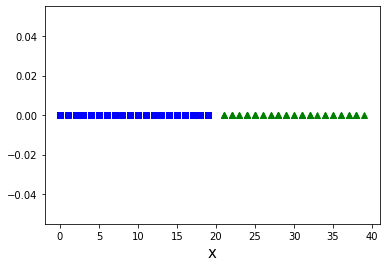

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X[:50], np.zeros(m), "bs")
plt.plot(X[50:], np.zeros(m), "g^")
plt.xlabel(r"x", fontsize=15)

<h3><b> Closed form </b></h3>

We can use Scikit-Learn methods to solve closed form solutions for svm classification. The solutions use Quadratic Programming to solve for the model parameters.

LinearSVC and SVC can be used for svm classification.

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVC

svm_clf = Pipeline([("scaler", StandardScaler()),
                    ("linear_svc", LinearSVC(loss="hinge"))])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(loss='hinge'))])

In [59]:
X_new = np.array([[5], [35]])

y_pred = svm_clf.predict(X_new)

print(y_pred)

[1. 0.]


We can plot a graph of the model's data and scores. Note that the line shown below is not the hyperplane, since this is a one-dimensional feature set, the hyperplane would simply be a point (decision boundary) that separates the data categories. Points to the right of this decision boundary will have a positive score, points to the left will have a negative score. Therefore, the line in this plot shows the scores for some data points.

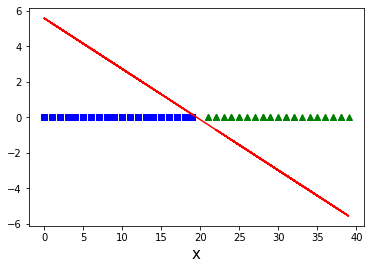

In [60]:
plt.plot(X[:50], np.zeros(m), "bs")
plt.plot(X[50:], np.zeros(m), "g^")
plt.xlabel(r"x", fontsize=15)

X_new = np.concatenate((random_points(25, 0, 20), random_points(25, 20, 40)), axis=0)
y_decision = svm_clf.decision_function(X_new)

plt.plot(X_new, y_decision, "r-")

In [61]:
from sklearn.svm import SVC

svm_clf = Pipeline([("scaler", StandardScaler()),
                    ("svc", SVC(kernel="linear"))])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(kernel='linear'))])

In [62]:
X_new = np.array([[5], [35]])

y_pred = svm_clf.predict(X_new)

print(y_pred)

[1. 0.]


We can plot a graph of the model's data and predictions:

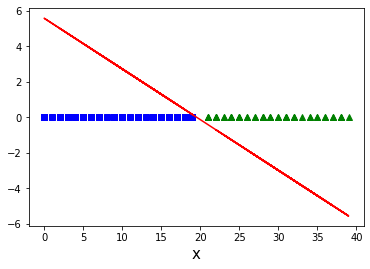

In [63]:
plt.plot(X[:50], np.zeros(m), "bs")
plt.plot(X[50:], np.zeros(m), "g^")
plt.xlabel(r"x", fontsize=15)

X_new = np.concatenate((random_points(25, 0, 20), random_points(25, 20, 40)), axis=0)
y_decision = svm_clf.decision_function(X_new)

plt.plot(X_new, y_decision, "r-")

<h3><b> Gradient Descent </b></h3>

We can use Scikit-Learn library to solve Gradient Descent algorithms.

<b> Batch Gradient Descent </b>

Scikit-Learn does not provide implementations for Batch Gradient or Mini-batch gradient descent. If you really need to perform linear regression with GD, you could do it easily in Keras or Tensorflow, assembling an LR model and using a batch size equal to the whole of your training samples.

<b> Stochastic Gradient Descent <b>

In [64]:
from sklearn.linear_model import SGDClassifier

eta = 0.1  # learning rate, for learning schedule, let's use the default ('constant')
n_epochs = 1000 # number of iterations
tol = 1e-3 # epsilon (tolerance)

# the default loss function is hinge - linear SVM

sgd_clf = Pipeline([("scaler", StandardScaler()),
                    ("sgd", SGDClassifier(max_iter=n_epochs, tol=tol, penalty=None, eta0=eta))])

sgd_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd', SGDClassifier(eta0=0.1, penalty=None))])

In [65]:
X_new = np.array([[5], [35]])

y_pred = svm_clf.predict(X_new)

print(y_pred)

[1. 0.]


We can plot a graph of the model's data and predictions:

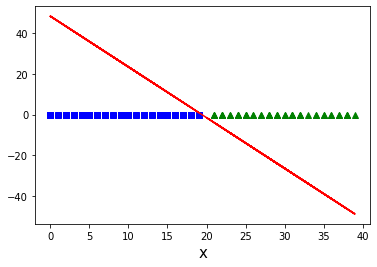

In [66]:
plt.plot(X[:50], np.zeros(m), "bs")
plt.plot(X[50:], np.zeros(m), "g^")
plt.xlabel(r"x", fontsize=15)

X_new = np.concatenate((random_points(25, 0, 20), random_points(25, 20, 40)), axis=0)
y_decision = sgd_clf.decision_function(X_new)

plt.plot(X_new, y_decision, "r-")

 The plot of the decision function values shows that the score is positive for values that belong to the first category (blue) and the score is negative for values that belong to the second category (green).

Let us now increase the number of dimensions (two) in the data set and see how we can create a model for this data and also predict for any new values.

We can use the Iris dataset as an example because it has categories that are linearly separable. To demonstrate the linearly separable case, we'll filter the dataset to only include the petal length and petal width parameters for the Iris-setosa and Iris-versicolor species. These two species have a different range for these parameter values without any overlap, allowing to easily dileneate the categories using a linear SVM.

In [152]:
import numpy as np
from sklearn.datasets import fetch_openml

# Fetch the data
# as_Frame=True will fetch data as pandas dataframe
# as_Frame=False will fetch data as array
iris = fetch_openml('iris', version=1, as_frame=True)

X = iris["data"].iloc[:, [2, 3]]  # petal length, petal width
y = iris["target"]

# Filter the target to only include setosa and versicolor
y_setosa_versicolor = (y.loc[y.cat.codes != 2])

# Update X and y values to only contain setosa and versicolor
X = (X.loc[y.cat.codes != 2])
y = (y_setosa_versicolor.cat.codes == 1).astype(np.float64)

In [85]:
# Function to plot the dataset
def plot_dataset(X, y, axes, xlabel=r"x_1", ylabel=r"x_2"):
  plt.plot(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], "bs")
  plt.plot(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], "g^")
  plt.axis(axes)
  plt.grid(True, which='both')
  plt.xlabel(xlabel, fontsize=15)
  plt.ylabel(ylabel, fontsize=15, rotation=90)

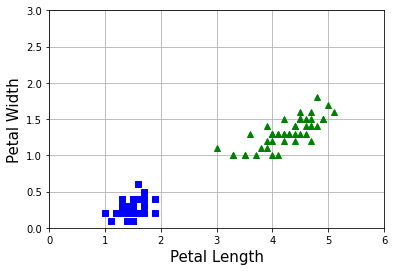

In [153]:
plot_dataset(X, y, [0, 6, 0, 3], "Petal Length", "Petal Width")
plt.show()

<h3><b> Closed form </b></h3>

We can use Scikit-Learn methods to solve closed form solutions for svm classification. The solutions use Quadratic Programming to solve for the model parameters.

LinearSVC and SVC can be used for svm classification.

In [154]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVC

svm_clf = Pipeline([("scaler", StandardScaler()),
                    ("linear_svc", LinearSVC(loss="hinge"))])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(loss='hinge'))])

In [155]:
X_new = np.array([[5.5, 1.7]])

y_predict = svm_clf.predict(X_new)

print(y_predict)

[1.]


We can plot a graph of the model's data and scores. Note that the line shown below is in fact the hyperplane, since this is a two-dimensional feature set, the hyperplane would be a line (decision boundary) that separates the data categories. Points one one side of this decision boundary will have a positive score, points one the other side will have a negative score.

Matplotlib's contour plot allows us to show the predicted values and predicted scores superimposed on the two-dimensional plot of the feature values. The plot of the predicted values, groups predicted values equal to 1 in one contour and those with predicted values equal to 0 in another contour (0 and 1 are the target values in this particular case), the contour boundary denotes the hyperplane (a line in this case).

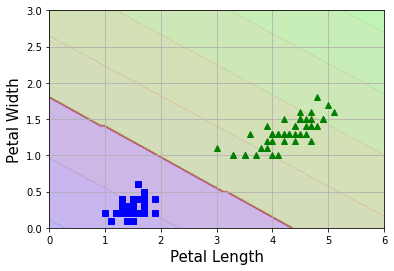

In [156]:
def plot_predictions(clf, axes):
  x0s = np.linspace(axes[0], axes[1], 100)
  x1s = np.linspace(axes[2], axes[3], 100)
  x0, x1 = np.meshgrid(x0s, x1s)
  X = np.c_[x0.ravel(), x1.ravel()]
  y_pred = clf.predict(X).reshape(x0.shape)
  y_decision = clf.decision_function(X).reshape(x0.shape)
  plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
  plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(svm_clf, [0, 7, 0, 3])
plot_dataset(X, y, [0, 6, 0, 3], "Petal Length", "Petal Width")

In [157]:
from sklearn.svm import SVC

svm_clf = Pipeline([("scaler", StandardScaler()),
                    ("svc", SVC(kernel="linear"))])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(kernel='linear'))])

In [158]:
y_predict = svm_clf.predict(X_new)

print(y_predict)

[1.]


We can plot a graph of the model's data and predictions:

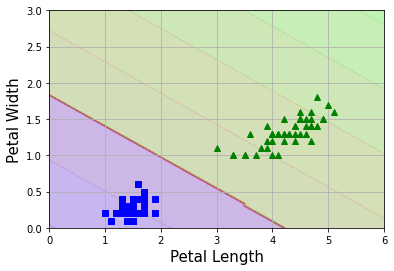

In [159]:
plot_predictions(svm_clf, [0, 7, 0, 3])
plot_dataset(X, y, [0, 6, 0, 3], "Petal Length", "Petal Width")

<h3><b> Gradient Descent </b></h3>

We can use Scikit-Learn library to solve Gradient Descent algorithms.

<b> Batch Gradient Descent </b>

Scikit-Learn does not provide implementations for Batch Gradient or Mini-batch gradient descent. If you really need to perform linear regression with GD, you could do it easily in Keras or Tensorflow, assembling an LR model and using a batch size equal to the whole of your training samples.

<b> Stochastic Gradient Descent <b>

In [160]:
from sklearn.linear_model import SGDClassifier

eta = 0.1  # learning rate, for learning schedule, let's use the default ('constant')
n_epochs = 1000 # number of iterations
tol = 1e-3 # epsilon (tolerance)

# the default loss function is hinge - linear SVM

sgd_clf = Pipeline([("scaler", StandardScaler()),
                    ("sgd", SGDClassifier(max_iter=n_epochs, tol=tol, penalty=None, eta0=eta))])

sgd_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd', SGDClassifier(eta0=0.1, penalty=None))])

In [161]:
y_predict = sgd_clf.predict(X_new)

print(y_predict)

[1.]


We can plot a graph of the model's data and predictions:

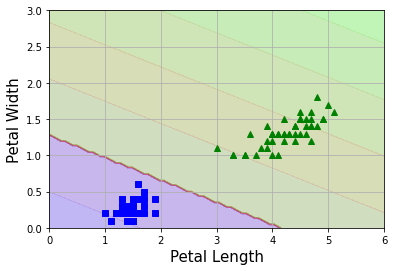

In [162]:
plot_predictions(sgd_clf, [0, 7, 0, 3])
plot_dataset(X, y, [0, 6, 0, 3], "Petal Length", "Petal Width")


<h2 style="background-color:rgba(100,100,100,0.5);"> SVM Classifier Programs (linear) Implementation </h2>

<table style="width:100%">
  <thead>
    <tr>
      <th></th>
      <th colspan="1">Normal Equation</th>
      <th colspan="3">GD</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td></td>
      <td></td>
      <td>Batch GD</td>
      <td>SGD</td>
      <td>Mini-batch GD</td>
    </tr>
    <tr>
      <td>ML (Scikit-Learn)</td>
      <td>Yes (LinearSVC or SVC class with kernel = "linear")</td>
      <td>No</td> 
      <td>Yes (SGDClassifier class with loss = "hinge")</td>
      <td>No</td>
    </tr>
  </tbody>  
</table>

<h2 style="background-color:rgba(100,100,100,0.5);"> SVM Classifier Programs (polynomial) - ML </h2>

<h3><b> Closed form </b></h3>

We can use Scikit-Learn methods to solve closed form solutions for svm classifier for polynomial features. The solutions use Quadratic Programming to solve for the model parameters.

LinearSVC, SVC can be used for SVM classifier with polynomial features.

Let's use the Moons dataset as an example because it contains categories that are not linearly separable, but rather needs a polynomial to separate them.

In [168]:
from sklearn.datasets import make_moons
import pandas as pd

# Fetch the data
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Convert to pandas objects
X = pd.DataFrame(X)
y = pd.Series(y)

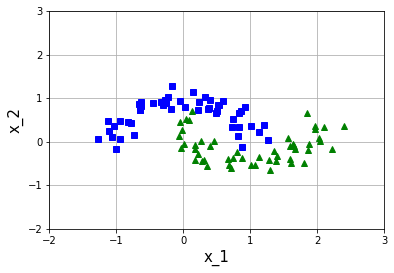

In [169]:
plot_dataset(X, y, [-2, 3, -2, 3])
plt.show()

In [170]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures

svm_clf = Pipeline([("scaler", StandardScaler()),
                    ("polynomial", PolynomialFeatures(degree=3)),
                    ("linear_svc", LinearSVC(loss="hinge"))])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=3)),
                ('linear_svc', LinearSVC(loss='hinge'))])

We can plot a graph of the model's data and scores. Note that the curve shown below is in fact the hyperplane, since this is a two-dimensional feature set, the hyperplane is a curve (decision boundary) that separates the data categories. If the data could be clearly separated into two distinct categories, this hyperplane would simply be a line, but in this case they are not so we need a curve to separate them. Points one one side of this decision boundary will have a positive score, points one the other side will have a negative score.

Matplotlib's contour plot allows us to show the predicted values and predicted scores superimposed on the two-dimensional plot of the feature values. The plot of the predicted values, groups predicted values equal to 1 in one contour and those with predicted values equal to 0 in another contour (0 and 1 are the target values in this particular case), the contour boundary denotes the hyperplane (a curve in this case).

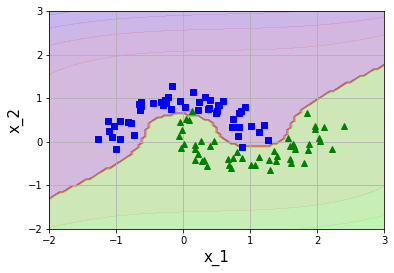

In [171]:
plot_predictions(svm_clf, [-2, 3, -2, 3])
plot_dataset(X, y, [-2, 3, -2, 3])

In [172]:
from sklearn.svm import SVC

# if you're using SVC with kernel ="poly", then you don't need to transform X
# using PolynomialFeatures, this will do it under the hood using the degree of the polynomial
# that you specify as input
svm_clf = Pipeline([("scaler", StandardScaler()),
                    ("poly_svc", SVC(kernel="poly", degree=3))])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('poly_svc', SVC(kernel='poly'))])

We can plot a graph of the model's data and predictions:

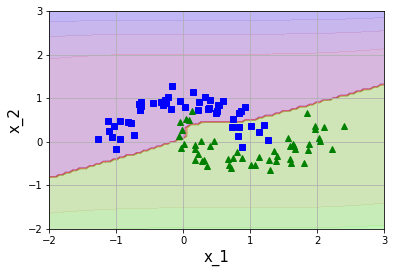

In [173]:
plot_predictions(svm_clf, [-2, 3, -2, 3])
plot_dataset(X, y, [-2, 3, -2, 3])

<h3><b> Gradient Descent </b></h3>

We can use Scikit-Learn library to solve Gradient Descent algorithms.

<b> Batch Gradient Descent </b>

Scikit-Learn does not provide implementations for Batch Gradient or Mini-batch gradient descent. If you really need to perform linear regression with GD, you could do it easily in Keras or Tensorflow, assembling an LR model and using a batch size equal to the whole of your training samples.

<b> Stochastic Gradient Descent <b>

In [174]:
from sklearn.linear_model import SGDClassifier

eta = 0.1  # learning rate, for learning schedule, let's use the default ('constant')
n_epochs = 1000 # number of iterations
tol = 1e-3 # epsilon (tolerance)

# the default loss function is hinge - linear SVM

sgd_clf = Pipeline([("scaler", StandardScaler()),
                    ("polynomial", PolynomialFeatures(degree=3)),
                    ("sgd", SGDClassifier(max_iter=n_epochs, tol=tol, penalty=None, eta0=eta))])

sgd_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=3)),
                ('sgd', SGDClassifier(eta0=0.1, penalty=None))])

We can plot a graph of the model's data and predictions:

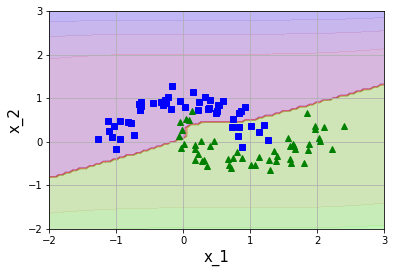

In [175]:
plot_predictions(svm_clf, [-2, 3, -2, 3])
plot_dataset(X, y, [-2, 3, -2, 3])


<h2 style="background-color:rgba(100,100,100,0.5);"> SVM Classifier Programs (polynomial) Implementation </h2>

<table style="width:100%">
  <thead>
    <tr>
      <th></th>
      <th colspan="1">Normal Equation</th>
      <th colspan="3">GD</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td></td>
      <td></td>
      <td>Batch GD</td>
      <td>SGD</td>
      <td>Mini-batch GD</td>
    </tr>
    <tr>
      <td>ML (Scikit-Learn)</td>
      <td>Yes (LinearSVC class with polynomial features, SVC class with kernel = "poly")</td>
      <td>No</td> 
      <td>Yes (SGDClassifier class with loss = "hinge" and polynomial features)</td>
      <td>No</td>
    </tr>
  </tbody>  
</table>

<h2 style="background-color:rgba(100,100,100,0.5);"> SVM Classifier - Regularization </h2>

<b> Closed form </b>

We can use Scikit-Learn SVM classifier methods to solve closed form solutions with regularization parameter (C).

In [176]:
X = iris["data"].iloc[:, [2, 3]]  # petal length, petal width
y = iris["target"]

# Filter the target to only include setosa and versicolor
y_setosa_versicolor = (y.loc[y.cat.codes != 2])

# Update X and y values to only contain setosa and versicolor
X = (X.loc[y.cat.codes != 2])
y = (y_setosa_versicolor.cat.codes == 1).astype(np.float64)

svm_clf = Pipeline([("scaler", StandardScaler()),
                    ("linear_svc", LinearSVC(loss="hinge", C=25))])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=25, loss='hinge'))])

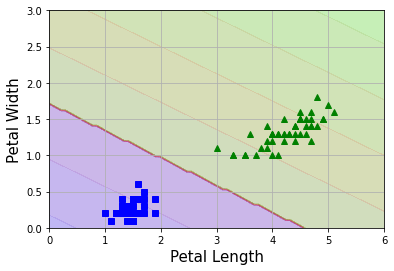

In [177]:
plot_predictions(svm_clf, [0, 7, 0, 3])
plot_dataset(X, y, [0, 6, 0, 3], "Petal Length", "Petal Width")

In [178]:
svm_clf = Pipeline([("scaler", StandardScaler()),
                    ("svc", SVC(kernel="linear", C=25))])
                    
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=25, kernel='linear'))])

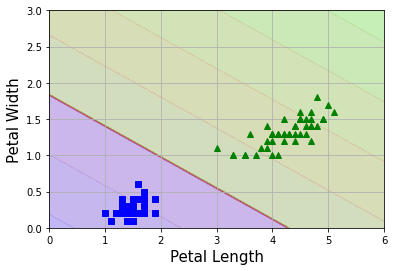

In [179]:
plot_predictions(svm_clf, [0, 7, 0, 3])
plot_dataset(X, y, [0, 6, 0, 3], "Petal Length", "Petal Width")

<b> Gradient Descent </b>

We can use Scikit-Learn library to solve Gradient Descent regularization algorithms.

In [180]:
eta = 0.1  # learning rate, for learning schedule, let's use the default ('constant')
n_epochs = 1000 # number of iterations
tol = 1e-3 # epsilon (tolerance)
alpha = 1/(100 * 20) # alpha regularization coefficient, 1/(m * C)

# the default loss function is hinge - linear SVM

sgd_clf = Pipeline([("scaler", StandardScaler()),
                    ("sgd", SGDClassifier(max_iter=n_epochs, alpha=alpha, tol=tol, penalty=None, eta0=eta))])

sgd_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd', SGDClassifier(alpha=0.0005, eta0=0.1, penalty=None))])

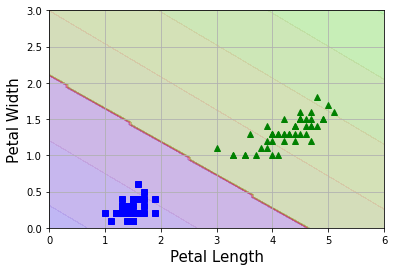

In [182]:
plot_predictions(sgd_clf, [0, 7, 0, 3])
plot_dataset(X, y, [0, 6, 0, 3], "Petal Length", "Petal Width")

<h2 style="background-color:rgba(100,100,100,0.5);"> SVM Regression (polynomial) - Regularization </h2>

<b> Closed form </b>

We can use Scikit-Learn SVM regression methods to solve closed form solutions with regularization parameter (C).

In [183]:
# Fetch the data
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Convert to pandas objects
X = pd.DataFrame(X)
y = pd.Series(y)

In [184]:
svm_clf = Pipeline([("scaler", StandardScaler()),
                    ("polynomial", PolynomialFeatures(degree=3)),
                    ("linear_svc", LinearSVC(loss="hinge", C=25))])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=3)),
                ('linear_svc', LinearSVC(C=25, loss='hinge'))])

We can plot a graph of the model's data and predictions:

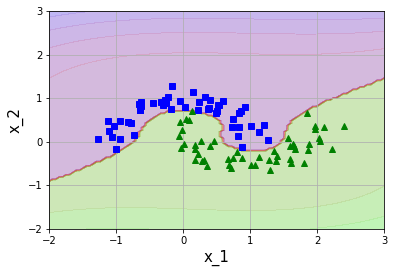

In [185]:
plot_predictions(svm_clf, [-2, 3, -2, 3])
plot_dataset(X, y, [-2, 3, -2, 3])

In [192]:
from sklearn.svm import SVC

# if you're using SVC with kernel ="poly", then you don't need to transform X
# using PolynomialFeatures, this will do it under the hood using the degree of the polynomial
# that you specify as input
svm_clf = Pipeline([("scaler", StandardScaler()),
                    ("poly_svc", SVC(kernel="poly", degree=3, C=100, coef0=5))])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_svc', SVC(C=100, coef0=5, kernel='poly'))])

We can plot a graph of the model's data and predictions:

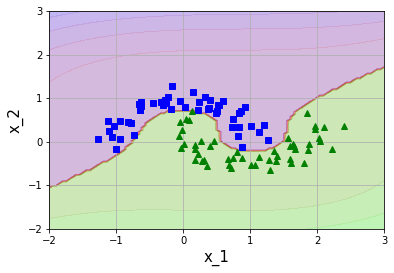

In [193]:
plot_predictions(svm_clf, [-2, 3, -2, 3])
plot_dataset(X, y, [-2, 3, -2, 3])

<h3><b> Gradient Descent </b></h3>

We can use Scikit-Learn library to solve Gradient Descent algorithms.

<b> Batch Gradient Descent </b>

Scikit-Learn does not provide implementations for Batch Gradient or Mini-batch gradient descent. If you really need to perform linear regression with GD, you could do it easily in Keras or Tensorflow, assembling an LR model and using a batch size equal to the whole of your training samples.

<b> Stochastic Gradient Descent <b>

In [194]:
from sklearn.linear_model import SGDClassifier

eta = 0.1  # learning rate, for learning schedule, let's use the default ('constant')
n_epochs = 1000 # number of iterations
tol = 1e-3 # epsilon (tolerance)
alpha = 1/(100 * 20) # alpha regularization coefficient, 1/(m * C)

# the default loss function is hinge - linear SVM

sgd_clf = Pipeline([("scaler", StandardScaler()),
                    ("polynomial", PolynomialFeatures(degree=3)),
                    ("sgd", SGDClassifier(max_iter=n_epochs, alpha=alpha, tol=tol, penalty=None, eta0=eta))])

sgd_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=3)),
                ('sgd', SGDClassifier(alpha=0.0005, eta0=0.1, penalty=None))])

We can plot a graph of the model's data and predictions:

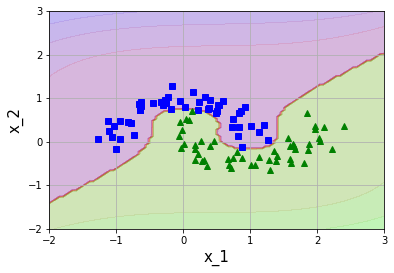

In [195]:
plot_predictions(sgd_clf, [-2, 3, -2, 3])
plot_dataset(X, y, [-2, 3, -2, 3])

<h2 style="background-color:rgba(100,100,100,0.5);"> Regularization Classifier Programs Implementation </h2>

<table style="width:100%">
  <thead>
    <tr>
      <th></th>
      <th colspan="1">Normal Equation</th>
      <th colspan="1">GD</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>SVM Classifier (Scikit-Learn)</td>
      <td>Yes (LinearSVC with C parameter or SVC class with kernel = "linear" and C parameter)</td> 
      <td>Yes (SGDClassifier with alpha = 1/(m * C))</td> 
    </tr>
    <tr>
      <td>SVM Classifier (polynomial) (Scikit-Learn)</td>
      <td>Yes (LinearSVC with polynomial features and C parameter or SVC class with kernel = "poly" and C parameter)</td> 
      <td>Yes (SGDClassifier with alpha = 1/(m * C) and Polynomial features)</td> 
    </tr>
  </tbody>  
</table>